In [42]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import warnings
warnings.filterwarnings("ignore")

# Create Dataframe

In [44]:
percent_EUR = np.arange(0, 100, 1)
df = pd.DataFrame(percent_EUR, columns=['%_EUR'])
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Gas Rate Function

In [45]:
def equrve_func(df):
    
    # Reservoir Input
    EUR = 500 # BSCF
    Pi = 5000 # psia
    CGRi = 50 # STB/MMSCF
    Qg_abd = 51.13 # MMSCF/D
    Pabd = 4184.5 # psia
    CGR_limit = 500 # STB/MMSCF
    WGR_limit = 100 # STB/MMSCF
    Downtime = 90 # %    
    
    # Type Curves Input for Gas Rate
    print('Gas Rate Input')
    end_incl_per_1 = float(input('End of Incline Period:'))
    ini_incl_rate_1 = float(input('Initial Rncline Rate:'))
    incl_fact_1 = float(input('Incline Factor:'))
    end_plat_per_1 = float(input('End of Plateau Period:'))
    plat_rate_1 = float(input('Plateau Rate'))
    str_dec_per_1 = float(input('Start of Decline Period'))
    ini_dec_rate_1 = float(input('Initial Decline Rate:'))
    dec_fact_1 = float(input('Decline Factor:'))
    
    # Gas Rate    
    for i in range(0, len(df)):        
        if df.loc[i, '%_EUR'] <= end_incl_per_1:
            gas_rate = ini_incl_rate_1*(np.exp((df.loc[i, '%_EUR'])*incl_fact_1))
        else:
            if df.loc[i, '%_EUR'] < str_dec_per_1:
                gas_rate = plat_rate_1
            elif ini_dec_rate_1*np.exp(df.loc[i, '%_EUR']*dec_fact_1) > plat_rate_1:
                gas_rate = plat_rate_1
            else:
                gas_rate = ini_dec_rate_1*np.exp(df.loc[i, '%_EUR']*dec_fact_1)
        df.loc[i,'Gas_Rate'] = round(gas_rate,3) 

        
    # Type Curves Input for CGR
    print('CGR Input')
    end_incl_per_2 = float(input('End of Incline Period:'))
    ini_incl_rate_2 = float(input('Initial Rncline Rate:'))
    incl_fact_2 = float(input('Incline Factor:'))
    end_plat_per_2 = float(input('End of Plateau Period:'))
    plat_rate_2 = float(input('Plateau Rate'))
    str_dec_per_2 = float(input('Start of Decline Period'))
    ini_dec_rate_2 = float(input('Initial Decline Rate:'))
    dec_fact_2 = float(input('Decline Factor:'))
    
    # CGR
    for i in range(0, len(df)):
        if end_plat_per_2 < str_dec_per_2: # if true
            if df.loc[i, '%_EUR'] <= end_incl_per_2:
                CGR_CGRi = ini_incl_rate_2*(np.exp(df.loc[i, '%_EUR']*incl_fact_2))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per_2:
                    CGR_CGRi = plat_rate_2
                else:
                    if ini_dec_rate_2*(np.exp(df.loc[i, '%_EUR']*dec_fact_2)) > plat_rate_2:
                        CGR_CGRi = plat_rate_2
                    else:
                        CGR_CGRi = ini_dec_rate_2*(np.exp(df.loc[i, '%_EUR']*dec_fact_2))
        else: # if false
            if df.loc[i, '%_EUR'] <= end_incl_per_2:
                CGR_CGRi = ini_incl_rate_2*(np.exp(df.loc[i, '%_EUR']*incl_fact_2))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per_2:
                    CGR_CGRi = plat_rate_2
                else:
                    if ini_dec_rate_2*(np.exp(df.loc[i, '%_EUR']*dec_fact_2)) > plat_rate_2:
                        CGR_CGRi = plat_rate_2
                    else:
                        CGR_CGRi = ini_dec_rate_2*(np.exp(df.loc[i, '%_EUR']*dec_fact_2))
                                
        df.loc[i,'CGR_CGRi'] = round(CGR_CGRi,3) 
        
        # CGR
        CGR = df.loc[i, 'CGR_CGRi']*CGRi
        df.loc[i, 'CGR'] = round(CGR, 3)    

    # Type Curves Input for WGR
    print('WGR Input')
    end_incl_per_3 = float(input('End of Incline Period:'))
    ini_incl_rate_3 = float(input('Initial Rncline Rate:'))
    incl_fact_3 = float(input('Incline Factor:'))
    end_plat_per_3 = float(input('End of Plateau Period:'))
    plat_rate_3 = float(input('Plateau Rate'))
    str_dec_per_3 = float(input('Start of Decline Period'))
    ini_dec_rate_3 = float(input('Initial Decline Rate:'))
    dec_fact_3 = float(input('Decline Factor:'))
    
    # WGR
    for i in range(0, len(df)):
        if end_plat_per_3 < str_dec_per_3:
            if df.loc[i, '%_EUR'] <= end_incl_per_3:
                WGR = ini_incl_rate_3*(np.exp(df.loc[i, '%_EUR']*incl_fact_3))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per_3:
                    WGR = plat_rate_3
                else:
                    if ini_dec_rate_3*(np.exp(df.loc[i, '%_EUR']*dec_fact_3)) > plat_rate_3:
                        WGR = plat_rate_3
                    else:
                        WGR = ini_dec_rate_3*(np.exp(df.loc[i, '%_EUR']*dec_fact_3))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per_3:
                WGR = ini_incl_rate_3*(np.exp(df.loc[i, '%_EUR']*incl_fact_3))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per_3:
                    WGR = plat_rate_3
                else:
                    if ini_dec_rate_3*(np.exp(df.loc[i, '%_EUR']*dec_fact_3)) > plat_rate_3:
                        WGR = plat_rate_3
                    else:
                        WGR = ini_dec_rate_3*(np.exp(df.loc[i, '%_EUR']*dec_fact_3))

        df.loc[i,'WGR'] = round(WGR,3)

    # Type Curves Input for Pres
    print('Pres Input')
    end_incl_per_4 = float(input('End of Incline Period:'))
    ini_incl_rate_4 = float(input('Initial Rncline Rate:'))
    incl_fact_4 = float(input('Incline Factor:'))
    end_plat_per_4 = float(input('End of Plateau Period:'))
    plat_rate_4 = float(input('Plateau Rate'))
    str_dec_per_4 = float(input('Start of Decline Period'))
    ini_dec_rate_4 = float(input('Initial Decline Rate:'))
    dec_fact_4 = float(input('Decline Factor:'))
    
    # Pr_Pi   
    for i in range(0, len(df)):
        if end_plat_per_4 < str_dec_per_4:
            if df.loc[i, '%_EUR'] <= end_incl_per_4:
                pr_pi = ini_incl_rate_4*(np.exp(df.loc[i, '%_EUR']*incl_fact_4))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per_4:
                    pr_pi = plat_rate_4
                else:
                    if ini_dec_rate_4*(np.exp(df.loc[i, '%_EUR']*dec_fact_4)) > plat_rate_4:
                        pr_pi = plat_rate_4
                    else:
                        pr_pi = ini_dec_rate_4*(np.exp(df.loc[i, '%_EUR']*dec_fact_4))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per_4:
                pr_pi = ini_incl_rate_4*(np.exp(df.loc[i, '%_EUR']*incl_fact_4))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per_4:
                    pr_pi = plat_rate_4
                else:
                    if ini_dec_rate_4*(np.exp(df.loc[i, '%_EUR']*dec_fact_4)) > plat_rate_4:
                        pr_pi = plat_rate_4
                    else:
                        pr_pi = ini_dec_rate_4*(np.exp(df.loc[i, '%_EUR']*dec_fact_4))
            
        df.loc[i,'Pr_Pi'] = round(pr_pi,3)
        
        # PRES
        pres = df.loc[i, 'Pr_Pi']*Pi
        df.loc[0, 'PRES'] = Pi
        df.loc[i, 'PRES'] = pres
    
    # Others
    # Find Qg
    for i in range(0, len(df)):
        if df.loc[i, '%_EUR'] > end_incl_per_1:
            if ((df.loc[i, 'Gas_Rate']/100)*(EUR/365)*1000 >= Qg_abd) and (df.loc[i, 'PRES'] >= Pabd) and (df.loc[i, 'CGR'] <= CGR_limit) and (df.loc[i, 'WGR'] <= WGR_limit):
                Qg = (df.loc[i, 'Gas_Rate']/100)*(EUR/365)*1000*(Downtime/100)
            else:
                Qg = np.nan
        else:
            Qg = (df.loc[i, 'Gas_Rate']/100)*(EUR/365)*1000*(Downtime/100)
        df.loc[i, 'Qg'] = round(Qg, 4)    
        
        # Find Cum GP
        Cum_GP = (df.loc[i, '%_EUR']/100) * EUR
        df.loc[i, 'Cum_GP'] = round(Cum_GP, 3)
        
        # Find no. of days
        df['No_of_Days'] = round((df['Cum_GP'] - df['Cum_GP'].shift(1))*1000/df['Qg'])
        df.loc[0, 'No_of_Days'] = 0

        # Find Cum Days
        df['Cum_Days'] = df.No_of_Days.cumsum()
        
        # Find Cum Month
        df['Cum_Month'] = round(df.Cum_Days/30)
        
        # Find Cum Year
        df['Cum_Year'] = round(df.Cum_Days/365, 1)
        
        # Find Qc
        df['Qc'] = round(df['Qg']*df['CGR'], 2)
        
        # Find Qw
        df['Qw'] = round(df['Qg']*df['WGR'], 2)
        
        # Compiling all the columns
        df = df[['%_EUR', 'Gas_Rate','CGR_CGRi', 'WGR', 'Pr_Pi', 'Qg', 'CGR', 'PRES', 'Cum_GP', 'No_of_Days', 
                 'Cum_Days', 'Cum_Month', 'Cum_Year', 'Qc', 'Qw']]
        
    return df

In [ ]:
test_1 = equrve_func(df) 

In [ ]:
test_1

## Plot of Gas Rate and Cumulative Gas vs Time

In [30]:
x = test_1['Cum_Year']
y1 = test_1['Qg']
y2 = test_1['Cum_GP']
# print(x, y)

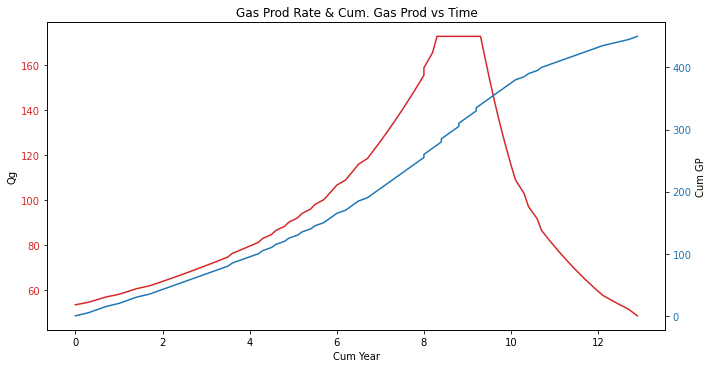

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:red'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('Qg')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Cum GP')
ax2.plot(x, y2, color = color)
ax2.tick_params(axis='y', labelcolor = color)

fig.tight_layout()
plt.title('Gas Prod Rate & Cum. Gas Prod vs Time')
plt.show()

## Plot of Condensate Rate and Condensate Gas Ratio vs Time

In [32]:
x = test_1['Cum_Year']
y1 = test_1['CGR_CGRi']
y2 = test_1['CGR']

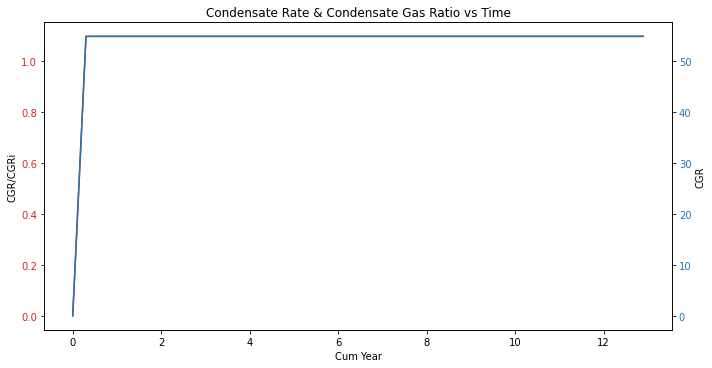

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:red'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('CGR/CGRi')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)

# Overlap Plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CGR')
ax2.plot(x, y2, color = color)
ax2.tick_params(axis='y', labelcolor = color)

fig.tight_layout()
plt.title('Condensate Rate & Condensate Gas Ratio vs Time')
plt.show()

## Plot of Water Rate and Water Gas Ratio vs Time

In [34]:
x = test_1['Cum_Year']
y1 = test_1['WGR']

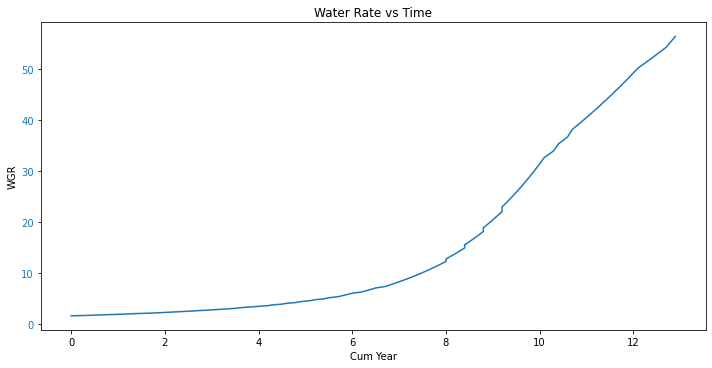

In [35]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('WGR')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)

fig.tight_layout()
plt.title('Water Rate vs Time')
plt.show()

## Plot of Reservoir Pressure vs Time

In [36]:
x = test_1['Cum_Year']
y1 = test_1['PRES']

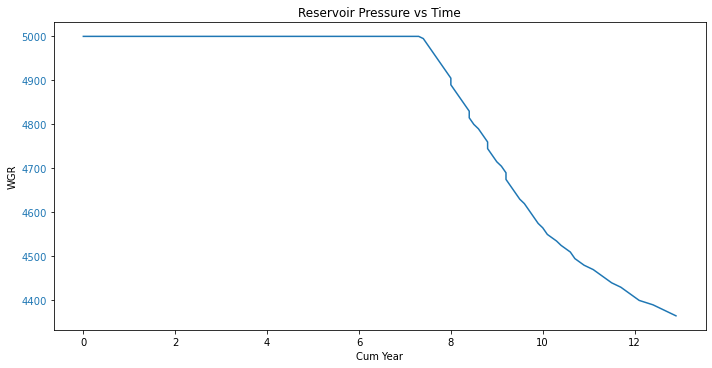

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('WGR')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)

fig.tight_layout()
plt.title('Reservoir Pressure vs Time')
plt.show()

In [38]:
def cgr_func(df):
    
    # Type Curves Input
    end_incl_per = 9
    ini_incl_rate = 0.3
    incl_fact = 0.3
    end_plat_per = 45
    plat_rate = 7.0
    str_dec_per = 45
    ini_dec_rate = 19
    dec_fact = -0.02
    
    # 2nd Input
    EUR = 12.944 # BSCF
    Pi = 2700 # psia
    CGRi = 5 # STB/MMSCF
    Qg_abd = 1 # MMSCF/D
    Pabd = 700 # psia
    CGR = 500 # STB/MMSCF
    WGR = 1000 # STB/MMSCF
    Downtime = 100 # %
    
    for i in range(0, len(df)):
        if end_plat_per < str_dec_per:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                CGR_CGRi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per:
                    CGR_CGRi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        CGR_CGRi = plat_rate
                    else:
                        CGR_CGRi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                CGR_CGRi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per:
                    CGR_CGRi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        CGR_CGRi = plat_rate
                    else:
                        CGR_CGRi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
                                
        df.loc[i,'CGR_CGRi'] = round(CGR_CGRi,3) 
        
        # CGR
        CGR = df.loc[i, 'CGR_CGRi']*CGRi
        df.loc[i, 'CGR'] = round(CGR, 3)
        
        df = df[['%_EUR', 'CGR_CGRi', 'CGR']]
        
    return df

In [39]:
df_cgr = cgr_func(df)

In [40]:
df_cgr

,%_EUR,CGR_CGRi,CGR
0,0,0.300,1.500
1,1,0.405,2.025
2,2,0.547,2.735
3,3,0.738,3.690
4,4,0.996,4.980
5,5,1.345,6.725
6,6,1.815,9.075
7,7,2.450,12.250
8,8,3.307,16.535
9,9,4.464,22.320


In [41]:
df_cgr.tail(10)

,%_EUR,CGR_CGRi,CGR
90,90,3.141,15.705
91,91,3.078,15.390
92,92,3.018,15.090
93,93,2.958,14.790
94,94,2.899,14.495
95,95,2.842,14.210
96,96,2.786,13.930
97,97,2.730,13.650
98,98,2.676,13.380
99,99,2.623,13.115


In [15]:
def wgr_func(df):
    
    # Type Curves Input
    end_incl_per = 9
    ini_incl_rate = 0.3
    incl_fact = 0.3
    end_plat_per = 45
    plat_rate = 7.0
    str_dec_per = 45
    ini_dec_rate = 19
    dec_fact = -0.02
    
    # 2nd Input
    EUR = 12.944 # BSCF
    Pi = 0 # psia
    CGRi = 0 # STB/MMSCF
    Qg_abd = 1 # MMSCF/D
    Pabd = 0 # psia
    CGR = 0 # STB/MMSCF
    WGR = 1000 # STB/MMSCF
    Downtime = 100 # %
    
    for i in range(0, len(df)):
        if end_plat_per < str_dec_per:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                WGR = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per:
                    WGR = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        WGR = plat_rate
                    else:
                        WGR = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                WGR = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per:
                    WGR = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        WGR = plat_rate
                    else:
                        WGR = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))

            
        df.loc[i,'WGR'] = round(WGR,3)     
            
        df = df[['%_EUR', 'WGR']]
        
    return df

In [54]:
df_wgr = wgr_func(df)

In [55]:
df_wgr.tail(10)

,%_EUR,WGR
41,4.1,1.026
42,4.2,1.058
43,4.3,1.090
44,4.4,1.123
45,4.5,1.157
46,4.6,1.192
47,4.7,1.229
48,4.8,1.266
49,4.9,1.305
50,5.0,1.345


In [16]:
def pres_func(df):
    # Type Curves Input
    end_incl_per = 10
    ini_incl_rate = 0.345
    incl_fact = 0.285
    end_plat_per = 40.47
    plat_rate = 6.7
    str_dec_per = 40
    ini_dec_rate = 18
    dec_fact = -0.02
    
    # 2nd Input
    EUR = 12.944 # BSCF
    Pi = 2700 # psia
    CGRi = 5 # STB/MMSCF
    Qg_abd = 1 # MMSCF/D
    Pabd = 700 # psia
    CGR = 500 # STB/MMSCF
    WGR = 1000 # STB/MMSCF
    Downtime = 100 # %

    for i in range(0, len(df)):
        if end_plat_per < str_dec_per:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                pr_pi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per:
                    pr_pi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        pr_pi = plat_rate
                    else:
                        pr_pi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                pr_pi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per:
                    pr_pi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        pr_pi = plat_rate
                    else:
                        pr_pi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
            
        df.loc[i,'Pr_Pi'] = round(pr_pi,3)
        
        # PRES
        pres = df.loc[i, 'Pr_Pi']*Pi
        df.loc[0, 'PRES'] = Pi
        df.loc[i, 'PRES'] = round(pres)
            
        df = df[['%_EUR', 'Pr_Pi', 'PRES']]
        
    return df

In [114]:
pres_func(df)

,%_EUR,Pr_Pi,PRES
0,0.0,0.345,2700.0
1,0.1,0.355,958.0
2,0.2,0.365,986.0
3,0.3,0.376,1015.0
4,0.4,0.387,1045.0
5,0.5,0.398,1075.0
6,0.6,0.409,1104.0
7,0.7,0.421,1137.0
8,0.8,0.433,1169.0
9,0.9,0.446,1204.0


In [102]:
df = pd.DataFrame({"Cum_GP": [0.0000, 0.0129, 0.0259, 0.0388, 0.0518], 
                   "Qg": [0.1223, 0.1258, 0.1295, 0.1332, 0.1371]})

In [103]:
df

,Cum_GP,Qg
0,0.0000,0.1223
1,0.0129,0.1258
2,0.0259,0.1295
3,0.0388,0.1332
4,0.0518,0.1371


In [105]:
df['New Col'] = round((df['Cum_GP'] - df['Cum_GP'].shift(1))*1000/df['Qg'])
df

,Cum_GP,Qg,New Col
0,0.0000,0.1223,NaN
1,0.0129,0.1258,103.0
2,0.0259,0.1295,100.0
3,0.0388,0.1332,97.0
4,0.0518,0.1371,95.0


In [20]:
diff = df.loc[0, 'Cum_GP']
output = []
for i in range(len(df)-1):
    x1 = (((df.loc[i+1, 'Cum_GP'])- diff))/df.loc[i, 'Qg']
    output.append(x1)
    diff = round(x1)
    
output

[0.10547833197056418,
 0.20588235294117646,
 0.2996138996138996,
 0.38888888888888884]

In [21]:
df = pd.DataFrame({"ID": [0, 1, 2, 3, 4], 
                   "VALUE": [1, 10, 30, 45, 78], 
                   "Divider": [3, 2, 3, 2, 3]})
cumsum_with_parity = df.groupby(df.index % 2).VALUE.cumsum()
df["NEWVALUE"] = ((cumsum_with_parity - cumsum_with_parity.shift().fillna(0))*1000)
df['Days'] = ((cumsum_with_parity - cumsum_with_parity.shift().fillna(0))*1000)/df['Divider']

In [22]:
df

,ID,VALUE,Divider,NEWVALUE,Days
0,0,1,3,1000.0,333.333333
1,1,10,2,9000.0,4500.000000
2,2,30,3,21000.0,7000.000000
3,3,45,2,24000.0,12000.000000
4,4,78,3,54000.0,18000.000000


In [23]:
df = pd.DataFrame({"Cum_GP": [0.0000, 0.0129, 0.0259, 0.0388, 0.0518], 
                   "Qg": [0.1223, 0.1258, 0.1295, 0.1332, 0.1371]})
cumsum_with_parity = df.groupby(df.index % 2).Cum_GP.cumsum()
df["No of Days"] = round(((cumsum_with_parity - cumsum_with_parity.shift().fillna(0))*1000)/df['Qg'])

In [24]:
df

,Cum_GP,Qg,No of Days
0,0.0000,0.1223,0.0
1,0.0129,0.1258,103.0
2,0.0259,0.1295,100.0
3,0.0388,0.1332,194.0
4,0.0518,0.1371,190.0


In [84]:
df = pd.DataFrame({"ID": [0, 1, 2, 3, 4], 
                   "VALUE": [1, 10, 30, 45, 78]})